In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('datasets\Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.shape

(400, 9)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.drop('Serial No.',axis=1,inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: >

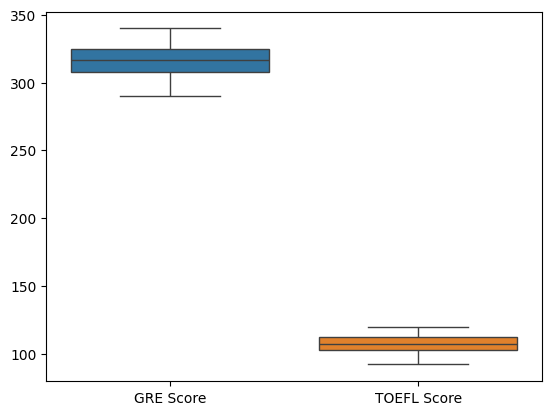

In [9]:
col=['GRE Score','TOEFL Score']
sns.boxplot(df[col])
# No outliers 

In [10]:
#Simle Linear Regression:- 1 IV and 1 DV
x=df[['CGPA']]
y=df['Chance of Admit ']
x

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
395,9.04
396,9.11
397,9.45
398,8.78


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
x_train.shape,x_test.shape

((280, 1), (120, 1))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.29145327],
       [ 0.08903843],
       [ 0.27458537],
       [ 0.08903843],
       [ 0.88182989],
       [-0.61941351],
       [-0.46760238],
       [-1.24352594],
       [-2.20499643],
       [ 1.77582877],
       [ 0.61194344],
       [ 1.70835716],
       [ 1.26979167],
       [-0.46760238],
       [-0.28205544],
       [-0.13024431],
       [ 1.03364102],
       [ 1.23605586],
       [-1.80016675],
       [-0.26518754],
       [-0.41699867],
       [ 0.25771747],
       [ 0.9155657 ],
       [ 1.37099909],
       [-1.02424319],
       [-0.97363948],
       [-0.45073448],
       [-0.24831964],
       [ 1.57341393],
       [-0.99050738],
       [ 1.50594232],
       [-0.67001722],
       [ 0.61194344],
       [ 0.59507553],
       [-0.68688512],
       [-0.99050738],
       [-3.0483916 ],
       [-0.60254561],
       [ 1.4216028 ],
       [ 0.86496199],
       [ 0.8986978 ],
       [-0.11337641],
       [ 0.78062247],
       [-0.68688512],
       [ 2.04571523],
       [ 0

In [15]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
y_pred

array([0.76246549, 0.7382067 , 0.76044393, 0.7382067 , 0.83322031,
       0.65330091, 0.67149501, 0.57850296, 0.46327368, 0.94036333,
       0.80087525, 0.93227706, 0.87971634, 0.67149501, 0.69373224,
       0.71192633, 0.85141441, 0.87567321, 0.51179127, 0.6957538 ,
       0.67755971, 0.75842236, 0.83726345, 0.89184574, 0.60478332,
       0.61084802, 0.67351657, 0.69777537, 0.91610453, 0.60882645,
       0.90801827, 0.64723621, 0.80087525, 0.79885369, 0.64521465,
       0.60882645, 0.36219536, 0.65532248, 0.89791044, 0.83119875,
       0.83524188, 0.7139479 , 0.82109092, 0.64521465, 0.97270839,
       0.7382067 , 0.69373224, 0.80693995, 0.63106368, 0.70384007,
       0.79076742, 0.61084802, 0.80896152, 0.76650862, 0.74022826,
       0.84534971, 0.53200693, 0.49561874, 0.75842236, 0.73416356,
       0.899932  , 0.73416356, 0.86960851, 0.75235766, 0.53807163,
       0.76448706, 0.84332814, 0.75437923, 0.64925778, 0.80693995,
       0.80087525, 0.57243826, 0.65936561, 0.62499898, 0.80693

In [16]:
lg.coef_

array([0.20215663])

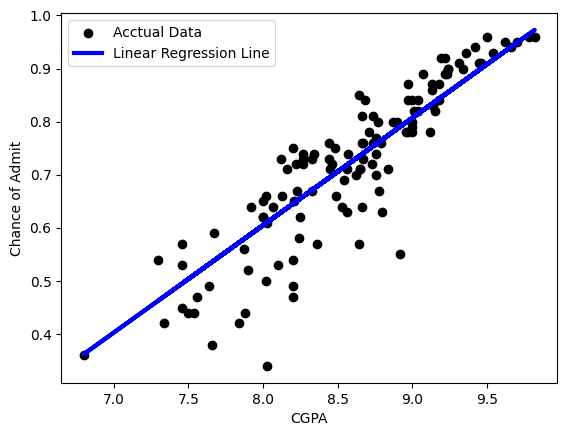

In [17]:
#Visualize TheResult
plt.scatter(x_test,y_test,color='black',label='Acctual Data')
plt.plot(x_test,y_pred,color='blue',linewidth=3,label="Linear Regression Line")
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

In [18]:
#Linear regression Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)


0.004904350585434013

In [19]:
r2_score(y_test,y_pred)

0.7850979166652726

In [20]:
#Multiple Linear Regression
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape

((280, 7), (120, 7))

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.fit(x_test)


StandardScaler()

In [36]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
39,307,108,2,4.0,3.5,7.70,0
167,313,102,3,2.0,3.0,8.27,0
383,300,100,3,3.0,3.5,8.26,0
221,316,110,3,3.5,4.0,8.56,0
351,325,110,4,3.5,4.0,8.67,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [24]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
y_pred

array([0.72166114, 0.69304191, 0.79027464, 0.78449776, 0.85244983,
       0.64480654, 0.63786861, 0.55308445, 0.49774164, 0.92989095,
       0.81542658, 0.92820739, 0.88074423, 0.64858157, 0.73342039,
       0.68351121, 0.81411151, 0.86665687, 0.52307279, 0.68761127,
       0.65918758, 0.7778779 , 0.83635922, 0.91519711, 0.66461006,
       0.57748551, 0.72895031, 0.71043422, 0.89825604, 0.66436642,
       0.94457159, 0.63326837, 0.79279315, 0.78322226, 0.71821524,
       0.6544174 , 0.45071761, 0.65586932, 0.90375958, 0.75460154,
       0.83837778, 0.68125867, 0.88015841, 0.65344351, 0.97287345,
       0.71691654, 0.73994485, 0.82701864, 0.63811343, 0.66534207,
       0.77772465, 0.56701255, 0.80310951, 0.73000019, 0.70716087,
       0.88804623, 0.48158167, 0.52828226, 0.7966439 , 0.79067431,
       0.91906691, 0.73374666, 0.87901756, 0.71685621, 0.53742315,
       0.77533845, 0.85988088, 0.75115036, 0.65850502, 0.80420112,
       0.80662542, 0.57849664, 0.7056416 , 0.62733557, 0.83768

In [25]:
lg.coef_

array([ 0.00141909,  0.00267904,  0.00891003, -0.00013112,  0.021021  ,
        0.10788875,  0.03021795])

In [26]:
lg.intercept_

-1.0546546856271535

In [27]:
#Multiple linear regression Evaluation
mean_absolute_error(y_test,y_pred)

0.04562939914766366

In [28]:
r2_score(y_test,y_pred)

0.810374311659813

In [29]:
#Ridge Regression 
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.1)
rr.fit(x_train,y_train)

for i,col_name in enumerate(x_train.columns):
    print(f"the coefficient for {col_name} is {rr.coef_[i]}")


the coefficient for GRE Score is 0.0014309482351115605
the coefficient for TOEFL Score is 0.002691212701872557
the coefficient for University Rating is 0.008943076921803215
the coefficient for SOP is -7.937350129362436e-05
the coefficient for LOR  is 0.0210580772931015
the coefficient for CGPA is 0.10735343150591499
the coefficient for Research is 0.03018496184601032


In [30]:
#For ridge regressio evaluation
y_pred=rr.predict(x_test)
r2_score(y_test,y_pred)

0.8102591288124603

In [31]:
#Lasso Regression 
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)

for i,col_name in enumerate(x_train.columns):
    print(f"the coefficient for {col_name} is {lasso_reg.coef_[i]}")

the coefficient for GRE Score is 0.006725804914219045
the coefficient for TOEFL Score is 0.00446337045288368
the coefficient for University Rating is 0.0
the coefficient for SOP is 0.0
the coefficient for LOR  is 0.0
the coefficient for CGPA is 0.0
the coefficient for Research is 0.0


In [32]:
#For lasso regressio evaluation
y_pred=lasso_reg.predict(x_test)
r2_score(y_test,y_pred)

0.7072601479002696

In [33]:
#Elastic Regression 
from sklearn.linear_model import ElasticNet
Elasticnet_reg=Lasso(alpha=0.01)
Elasticnet_reg.fit(x_train,y_train)

for i,col_name in enumerate(x_train.columns):
    print(f"the coefficient for {col_name} is {Elasticnet_reg.coef_[i]}")

the coefficient for GRE Score is 0.004629674690760936
the coefficient for TOEFL Score is 0.0061351650714165755
the coefficient for University Rating is 0.009658925597452968
the coefficient for SOP is 0.00023083507657531424
the coefficient for LOR  is 0.024341226957527443
the coefficient for CGPA is 0.008055056506325663
the coefficient for Research is 0.0


In [34]:
#For ElasticNet regressio evaluation
y_pred=Elasticnet_reg.predict(x_test)
r2_score(y_test,y_pred)

0.7651552035902863